# Подбор модели

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge, ARDRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU 
%matplotlib inline 
sns.set(style="ticks")

В качестве метрики для оценки моделей возьмём среднюю абсолютную ошибку (mae) и коэффициент детерминации (R2)

In [19]:
# хранение оценок моделей
# y1 - Модуль упругости при растяжении, ГПа
# y2 - Прочность при растяжении, МПа

MAE_y1=[]
MAE_y2=[]
R2_y1=[]
R2_y2=[]

In [20]:
# Загрузка данных для обучения
df = pd.read_csv('Datasets/df_clean.csv')
df.head()


,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [21]:
y = df[['Прочность при растяжении, МПа','Модуль упругости при растяжении, ГПа']]
y1 = df[['Прочность при растяжении, МПа']]
y2 = df[['Модуль упругости при растяжении, ГПа']]
y.head()

,"Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа"
0,3000.0,70.0
1,3000.0,70.0
2,3000.0,70.0
3,3000.0,70.0
4,3000.0,70.0


In [22]:
X = df.drop(columns=['Unnamed: 0', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
X.T

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
Соотношение матрица-наполнитель,1.857143,1.857143,2.771331,2.767918,2.569620,2.561475,3.557018,3.532338,2.919678,2.877358,...,2.310394,1.646235,2.806563,3.745862,2.758727,2.271346,3.444022,3.280604,3.705351,3.808020
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2000.000000,1910.000000,1900.000000,1930.000000,2100.000000,2160.000000,1990.000000,...,1931.146887,2014.772547,1872.864660,1914.629424,2000.506141,1952.087902,2050.089171,1972.372865,2066.799773,1890.413468
"модуль упругости, ГПа",738.736842,738.736842,753.000000,748.000000,807.000000,535.000000,889.000000,1421.000000,933.000000,1628.000000,...,554.010341,841.064806,996.018683,680.683701,934.564388,912.855545,444.732634,416.836524,741.475517,417.316232
"Количество отвердителя, м.%",50.000000,129.000000,111.860000,111.860000,111.860000,111.860000,129.000000,129.000000,129.000000,129.000000,...,96.749782,102.979906,146.199194,110.979100,143.021859,86.992183,145.981978,110.533477,141.397963,129.183416
"Содержание эпоксидных групп,%_2",23.750000,21.250000,22.267857,22.267857,22.267857,22.267857,21.250000,21.250000,21.250000,21.250000,...,22.146487,21.073367,21.559290,25.922635,21.379518,20.123249,19.599769,23.957502,19.246945,27.474763
"Температура вспышки, С_2",284.615385,300.000000,284.615385,284.615385,284.615385,284.615385,300.000000,300.000000,300.000000,300.000000,...,214.827727,271.490843,313.900486,309.796388,273.852679,324.774576,254.215401,248.423047,275.779840,300.952708
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000,380.000000,380.000000,1010.000000,1010.000000,1010.000000,...,56.242761,615.168127,799.634090,628.364550,65.105965,209.198700,350.660830,740.142791,641.468152,758.747882
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000,120.000000,120.000000,300.000000,300.000000,300.000000,...,87.270139,232.428214,307.265172,152.184720,229.780372,125.007669,117.730099,236.606764,197.126067,194.754342
"Угол нашивки, град",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
Шаг нашивки,4.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,9.000000,...,7.683346,5.048503,5.240448,8.057020,8.736592,9.076380,10.565614,4.161154,6.313201,6.078902


In [23]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [24]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
Xnorm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
ynorm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [25]:
#разбиение данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(Xnorm,ynorm, test_size=0.3, random_state=42, shuffle=True)


In [26]:
 X_test_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,0.418902,0.738395,0.440497,0.567588,0.403313,0.283206,0.172340,0.592926,0.0,0.430962,0.875073
377,0.665364,0.217913,0.614463,0.801616,0.529633,0.526186,0.215701,0.306343,0.0,0.503770,0.656966
538,0.419591,0.369363,0.365845,0.642552,0.463827,0.720931,0.473159,0.624456,1.0,0.462686,0.482478
296,0.351839,0.703961,0.391876,0.494342,0.337834,0.681121,0.166470,0.530558,0.0,0.661454,0.462011
531,0.344000,0.539152,0.349106,0.263748,0.577148,0.806815,0.496862,0.566806,1.0,0.591613,0.482378
...,...,...,...,...,...,...,...,...,...,...,...
420,0.290905,0.829071,0.468644,0.452294,0.541788,0.575093,0.550558,0.156250,0.0,0.576148,0.151102
133,0.287292,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.672341,0.0,0.291997,0.552182
490,0.598572,0.312508,0.496594,0.697279,0.466942,0.498268,0.061419,0.632369,1.0,0.420066,0.479449
558,0.268813,0.360882,0.231856,0.452929,0.173665,0.376940,0.028686,0.291147,1.0,0.308641,0.393330


In [27]:
 X_test

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,2.544192,2062.918247,718.492638,119.924425,21.043501,237.911236,223.049480,242.416875,0,5.939560,78.847771
377,3.719015,1866.653447,1001.285793,153.427803,22.718403,288.133573,279.016949,160.304704,0,6.936649,66.339135
538,2.547478,1923.762595,597.141517,130.656142,21.845865,328.386305,611.326829,251.450925,90,6.374020,56.332103
296,2.224520,2049.933793,639.456649,109.438533,20.175300,320.157689,215.472646,224.547176,0,9.096101,55.158340
531,2.187155,1987.787140,569.930605,76.426670,23.348416,346.137893,641.922189,234.932782,90,8.139645,56.326376
...,...,...,...,...,...,...,...,...,...,...,...
420,1.934061,2097.110886,764.246548,103.418855,22.879573,298.242389,711.229254,117.299954,0,7.927846,37.327435
133,1.916843,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,265.171039,0,4.036464,60.329680
490,3.400636,1902.323754,809.682112,138.490884,21.887169,282.363184,79.879899,253.718185,90,5.790341,56.158437
558,1.828754,1920.564566,379.333489,103.509806,17.998559,257.285562,37.629351,155.950624,90,4.264403,51.219411


In [28]:
X_train_norm.shape

(644, 11)

In [29]:
X_test_norm.shape

(277, 11)

In [30]:
y_train_norm.shape

(644, 2)

In [31]:
y_test_norm.shape

(277, 2)

### Ridge regression


#### Гиперпараметры для поиска по сетке

In [32]:
params = [{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

#### Поиск по сетке с перекрестной проверкой

In [33]:
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)

cv.fit(X_train_norm,y_train_norm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [34]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 20, 'solver': 'sag'}
Лучший средний балл перекрестной проверки:
-0.19174322741906194


In [35]:
# модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(X_train_norm,y_train_norm)
print (modelRidge.predict(X_test_norm).shape)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Ridge_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Ridge_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAERidge_1)
print (MAERidge_2)
print (R2Ridge_1)
print (R2Ridge_2)

(277, 2)
383.5418949118066
2.4553258416318995
0.002730871685173608
0.0012353687943925662


In [36]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['Ridge_norm',MAERidge_1])
MAE_y2.append(['Ridge_norm',MAERidge_2])
R2_y1.append(['Ridge_norm',R2Ridge_1])
R2_y2.append(['Ridge_norm',R2Ridge_2])

In [37]:
print(modelRidge.coef_)

[[-0.00861219 -0.02796302  0.02677959 -0.04697297 -0.00215216 -0.01310678
  -0.00824229  0.0021143  -0.00524515 -0.01594458  0.01973275]
 [-0.00574111 -0.01273253  0.02296617 -0.02265006  0.01996574  0.02058183
   0.0120778   0.02868866  0.01760812 -0.02169831  0.00963419]]


In [38]:
lambda_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

for lambda_val in lambda_values:
    modelRidge = Ridge(lambda_val)
    modelRidge.fit(X_train_norm,y_train_norm)
    y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
    MAERidge_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
    MAERidge_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
    R2Ridge_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
    R2Ridge_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
    print(("Lambda={} ошибка MAE={}").format(lambda_val, MAERidge_1))
    print(('Lambda={} ошибка MAE={}').format(lambda_val, MAERidge_2))
    print(("Lambda={} ошибка R2={}").format(lambda_val, R2Ridge_1))
    print(('Lambda={} ошибка R2={}').format(lambda_val, R2Ridge_2))
    print("_____")
           

Lambda=1e-05 ошибка MAE=384.02981382918927
Lambda=1e-05 ошибка MAE=2.455218159751366
Lambda=1e-05 ошибка R2=0.0012182657244278472
Lambda=1e-05 ошибка R2=-0.0001115253147343509
_____
Lambda=0.0001 ошибка MAE=384.02980526467843
Lambda=0.0001 ошибка MAE=2.455218164688233
Lambda=0.0001 ошибка R2=0.0012183023436718177
Lambda=0.0001 ошибка R2=-0.00011148980871622527
_____
Lambda=0.001 ошибка MAE=384.02971962189065
Lambda=0.001 ошибка MAE=2.4552182140493852
Lambda=0.001 ошибка R2=0.001218668495702513
Lambda=0.001 ошибка R2=-0.00011113479064195353
_____
Lambda=0.01 ошибка MAE=384.02886342603904
Lambda=0.01 ошибка MAE=2.4552187069095046
Lambda=0.01 ошибка R2=0.0012223259783314955
Lambda=0.01 ошибка R2=-0.00010758881726902203
_____
Lambda=0.1 ошибка MAE=384.0203246329341
Lambda=0.1 ошибка MAE=2.4552235608306376
Lambda=0.1 ошибка R2=0.0012585001115482664
Lambda=0.1 ошибка R2=-7.254640079268349e-05
_____
Lambda=0.2 ошибка MAE=384.0108863244137
Lambda=0.2 ошибка MAE=2.4552287967630355
Lambda=0.2 ош

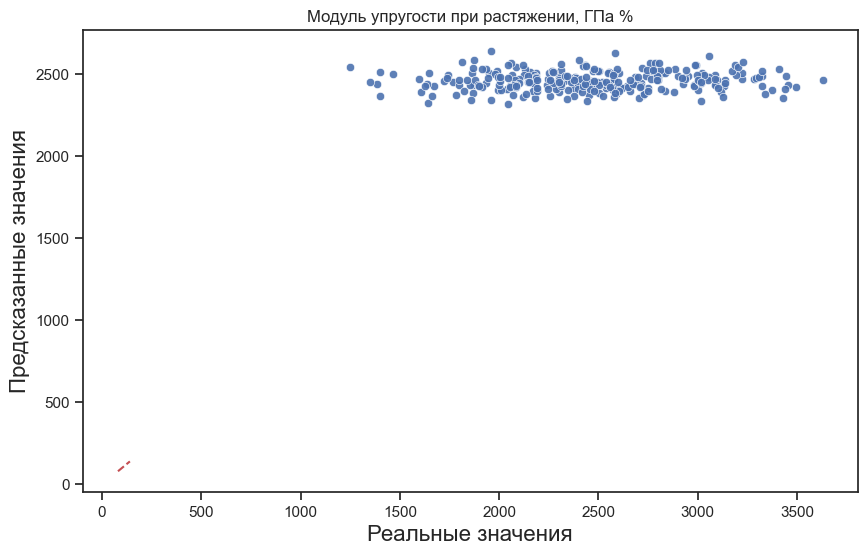

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.iloc[:,0], y=y_pred[:,0], alpha=0.9)
line_X = np.linspace(80, 140, 140)
line_Y = line_X
plt.plot(line_X, line_Y, 'r--')
plt.title("Модуль упругости при растяжении, ГПа %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

In [40]:
# Другой способ Ridge
ridge_reg = Ridge(alpha=0.0004, solver='lsqr')
ridge_reg.fit(X_train_norm, y_train_norm)

y_pred = scaler_norm_y.inverse_transform(ridge_reg.predict(X_test_norm))

ridge_r2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("---RIDGE REGRESSION---")
print("R2 score: "+str(ridge_r2))
print("Mean Absolute Error: "+str(ridge_mae))
print("Root Mean Squared Error: "+str(ridge_rmse))


---RIDGE REGRESSION---
R2 score: 0.000700649026796285
Mean Absolute Error: 193.24266278628895
Root Mean Squared Error: 238.54766381543484


### Lasso regression


In [41]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelLasso.predict(X_test_norm))
MAELasso_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAELasso_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Lasso_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Lasso_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAELasso_1)
print (MAELasso_2)
print (R2Lasso_1)
print (R2Lasso_2)

383.097866737492
2.457493958479991
0.002848723559773725
-0.0010797663056409945


In [42]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['Lasso_norm',MAELasso_1])
MAE_y2.append(['Lasso_norm',MAELasso_2])
R2_y1.append(['Lasso_norm',R2Lasso_1])
R2_y2.append(['Lasso_norm',R2Lasso_2])

In [43]:
print(modelLasso.coef_)

[[-0.         -0.02376442  0.02347133 -0.06139133 -0.         -0.
  -0.          0.         -0.0013805  -0.00205517  0.00872139]
 [-0.         -0.          0.01495655 -0.01117377  0.00627417  0.00937457
   0.          0.02608957  0.01651856 -0.00966777  0.        ]]


### ElasticNet regression

In [44]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelElastic.predict(X_test_norm))
MAEElastic_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEElastic_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Elastic_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Elastic_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEElastic_1)
print (MAEElastic_2)
print (R2Elastic_1)
print (R2Elastic_2)

383.6141264048189
2.451154883756544
-0.0002346847720882117
-0.0008636129783949897


In [45]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['Elastic_norm',MAEElastic_1])
MAE_y2.append(['Elastic_norm',MAEElastic_2])
R2_y1.append(['Elastic_norm',R2Elastic_1])
R2_y2.append(['Elastic_norm',R2Elastic_2])

In [46]:
print(modelElastic.coef_)

[[-0. -0.  0. -0. -0. -0. -0.  0. -0. -0.  0.]
 [-0. -0.  0. -0.  0.  0.  0.  0.  0. -0.  0.]]


### GradientBoostingRegressor

In [47]:
# модель регрессии GradientBoostingRegressor
modelGBR_1 = GradientBoostingRegressor()
modelGBR_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelGBR_1.predict(X_test_norm)
modelGBR_2 = GradientBoostingRegressor()
modelGBR_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelGBR_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEGBR_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEGBR_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2GBR_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2GBR_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEGBR_1)
print (MAEGBR_2)
print (R2GBR_1)
print (R2GBR_2)

393.13246980109784
2.5388210899684136
-0.048770117481916175
-0.07510630778134475


In [48]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['GBR_norm',MAEGBR_1])
MAE_y2.append(['GBR_norm',MAEGBR_2])
R2_y1.append(['GBR_norm',R2GBR_1])
R2_y2.append(['GBR_norm',R2GBR_2])

### KNeighborsRegressor

In [49]:
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_norm)
modelNeihg_2 = KNeighborsRegressor()
modelNeihg_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Neihg_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Neihg_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)
print (R2Neihg_1)
print (R2Neihg_2)

391.2828506285685
2.6327301135045733
-0.051443416391736996
-0.19732065675533494


In [50]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['KNeighborsRegressor_norm',MAENeihg_1])
MAE_y2.append(['KNeighborsRegressor_norm',MAENeihg_2])
R2_y1.append(['KNeighborsRegressor_norm',R2Neihg_1])
R2_y2.append(['KNeighborsRegressor_norm',R2Neihg_2])

### DecisionTreeRegressor

In [51]:
# модель регрессии DecisionTreeRegressor
modelTree_1 = DecisionTreeRegressor(max_depth=3)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Tree_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Tree_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)
print (R2Tree_1)
print (R2Tree_2)

392.66753278727106
2.7284355495088404
-0.09040396890291658
-0.28280169084272266


In [52]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['DecisionTreeRegressor_norm',MAETree_1])
MAE_y2.append(['DecisionTreeRegressor_norm',MAETree_2])
R2_y1.append(['DecisionTreeRegressor_norm',R2Tree_1])
R2_y2.append(['DecisionTreeRegressor_norm',R2Tree_2])


### RandomForestRegressor

In [53]:
# модель регрессии RandomForestRegressor
modelForest_1 = RandomForestRegressor(max_depth=5)
modelForest_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelForest_1.predict(X_test_norm)

modelForest_2 = RandomForestRegressor(max_depth=5)
modelForest_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelForest_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEForest_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEForest_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Forest_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Forest_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEForest_1)
print (MAEForest_2)
print (R2Forest_1)
print (R2Forest_2)

383.660282651128
2.4869743058053864
-0.003275766325214313
-0.025697301050863874


In [54]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['RandomForestRegressor_norm',MAEForest_1])
MAE_y2.append(['RandomForestRegressor_norm',MAEForest_2])
R2_y1.append(['RandomForestRegressor_norm',R2Forest_1])
R2_y2.append(['RandomForestRegressor_norm',R2Forest_2])

### AdaBoostRegressor

In [55]:
# модель регрессии AdaBoostRegressor
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_1 = modelAda_1.predict(X_test_norm)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_2 = modelAda_2.predict(X_test_norm)

y_pred = np.vstack((y_pred_1,y_pred_2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Ada_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Ada_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)
print (R2Ada_1)
print (R2Ada_2)

396.82548008181976
2.5898282573327136
-0.06298777598022176
-0.1373357443049088


In [56]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['AdaBoostRegressor_norm',MAEAda_1])
MAE_y2.append(['AdaBoostRegressor_norm',MAEAda_2])
R2_y1.append(['AdaBoostRegressor_norm',R2Ada_1])
R2_y2.append(['AdaBoostRegressor_norm',R2Ada_2])

### Полносвязная нейронная сеть

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
19/19 - 0s - loss: 0.0436 - mae: 0.1685 - val_loss: 0.0294 - val_mae: 0.1421 - 444ms/epoch - 23ms/step
Epoch 2/100
19/19 - 0s - loss: 0.0416 - mae: 0.1629 - val_loss: 0.0283 - va

Epoch 65/100
19/19 - 0s - loss: 0.0370 - mae: 0.1519 - val_loss: 0.0270 - val_mae: 0.1393 - 30ms/epoch - 2ms/step
Epoch 66/100
19/19 - 0s - loss: 0.0364 - mae: 0.1511 - val_loss: 0.0281 - val_mae: 0.1401 - 27ms/epoch - 1ms/step
Epoch 67/100
19/19 - 0s - loss: 0.0353 - mae: 0.1483 - val_loss: 0.0276 - val_mae: 0.1398 - 29ms/epoch - 2ms/step
Epoch 68/100
19/19 - 0s - loss: 0.0357 - mae: 0.1494 - val_loss: 0.0267 - val_mae: 0.1398 - 28ms/epoch - 1ms/step
Epoch 69/100
19/19 - 0s - loss: 0.0353 - mae: 0.1481 - val_loss: 0.0276 - val_mae: 0.1398 - 28ms/epoch - 1ms/step
Epoch 70/100
19/19 - 0s - loss: 0.0355 - mae: 0.1491 - val_loss: 0.0268 - val_mae: 0.1394 - 30ms/epoch - 2ms/step
Epoch 71/100
19/19 - 0s - loss: 0.0351 - mae: 0.1483 - val_loss: 0.0276 - val_mae: 0.1397 - 28ms/epoch - 1ms/step
Epoch 72/100
19/19 - 0s - loss: 0.0359 - mae: 0.1501 - val_loss: 0.0277 - val_mae: 0.1398 - 29ms/epoch - 2ms/step
Epoch 73/100
19/19 - 0s - loss: 0.0357 - mae: 0.1495 - val_loss: 0.0268 - val_mae: 0.139

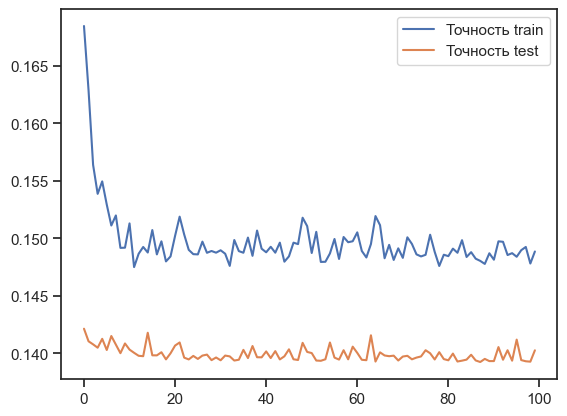

In [57]:
# модель полносвязной нейронной сети для целевого параметра y1
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1.add(Dropout(0.5))
modelNN_y1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1.add(Dense(1, activation = 'tanh'))
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1.summary()
history = modelNN_y1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
19/19 - 0s - loss: 0.0914 - mae: 0.2435 - val_loss: 0.0418 - val_mae: 0.1668 - 358ms/epoch - 19ms/step
Epoch 2/80
19/19 - 0s - loss: 0.0609 - mae: 0.1982 - val_loss: 0.0284 - va

Epoch 66/80
19/19 - 0s - loss: 0.0365 - mae: 0.1516 - val_loss: 0.0272 - val_mae: 0.1396 - 32ms/epoch - 2ms/step
Epoch 67/80
19/19 - 0s - loss: 0.0356 - mae: 0.1489 - val_loss: 0.0267 - val_mae: 0.1404 - 30ms/epoch - 2ms/step
Epoch 68/80
19/19 - 0s - loss: 0.0355 - mae: 0.1490 - val_loss: 0.0283 - val_mae: 0.1405 - 30ms/epoch - 2ms/step
Epoch 69/80
19/19 - 0s - loss: 0.0355 - mae: 0.1492 - val_loss: 0.0274 - val_mae: 0.1400 - 33ms/epoch - 2ms/step
Epoch 70/80
19/19 - 0s - loss: 0.0354 - mae: 0.1486 - val_loss: 0.0272 - val_mae: 0.1399 - 33ms/epoch - 2ms/step
Epoch 71/80
19/19 - 0s - loss: 0.0361 - mae: 0.1502 - val_loss: 0.0294 - val_mae: 0.1414 - 34ms/epoch - 2ms/step
Epoch 72/80
19/19 - 0s - loss: 0.0350 - mae: 0.1486 - val_loss: 0.0270 - val_mae: 0.1397 - 25ms/epoch - 1ms/step
Epoch 73/80
19/19 - 0s - loss: 0.0357 - mae: 0.1490 - val_loss: 0.0268 - val_mae: 0.1398 - 36ms/epoch - 2ms/step
Epoch 74/80
19/19 - 0s - loss: 0.0358 - mae: 0.1496 - val_loss: 0.0268 - val_mae: 0.1396 - 34ms/

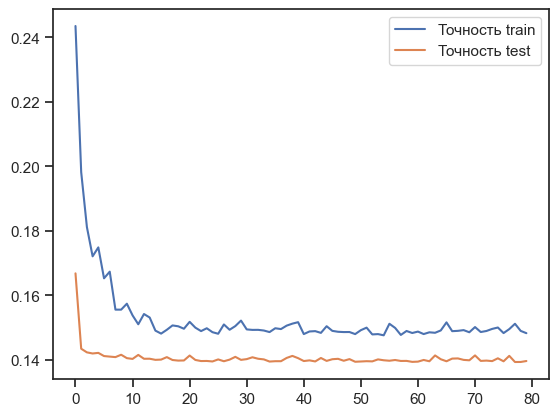

In [58]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1_1 = Sequential()
modelNN_y1_1.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y1_1.add(Dropout(0.5))
modelNN_y1_1.add(Dense(32, activation = 'sigmoid'))
modelNN_y1_1.add(Dense(1, activation = 'relu'))
modelNN_y1_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1_1.summary()
history = modelNN_y1_1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                

Epoch 62/80
19/19 - 0s - loss: 0.0360 - mae: 0.1503 - val_loss: 0.0274 - val_mae: 0.1419 - 32ms/epoch - 2ms/step
Epoch 63/80
19/19 - 0s - loss: 0.0373 - mae: 0.1528 - val_loss: 0.0271 - val_mae: 0.1395 - 29ms/epoch - 2ms/step
Epoch 64/80
19/19 - 0s - loss: 0.0356 - mae: 0.1495 - val_loss: 0.0281 - val_mae: 0.1402 - 27ms/epoch - 1ms/step
Epoch 65/80
19/19 - 0s - loss: 0.0353 - mae: 0.1486 - val_loss: 0.0267 - val_mae: 0.1397 - 28ms/epoch - 1ms/step
Epoch 66/80
19/19 - 0s - loss: 0.0356 - mae: 0.1502 - val_loss: 0.0276 - val_mae: 0.1398 - 28ms/epoch - 1ms/step
Epoch 67/80
19/19 - 0s - loss: 0.0350 - mae: 0.1482 - val_loss: 0.0268 - val_mae: 0.1405 - 29ms/epoch - 2ms/step
Epoch 68/80
19/19 - 0s - loss: 0.0352 - mae: 0.1473 - val_loss: 0.0288 - val_mae: 0.1407 - 33ms/epoch - 2ms/step
Epoch 69/80
19/19 - 0s - loss: 0.0355 - mae: 0.1493 - val_loss: 0.0280 - val_mae: 0.1401 - 29ms/epoch - 2ms/step
Epoch 70/80
19/19 - 0s - loss: 0.0357 - mae: 0.1495 - val_loss: 0.0268 - val_mae: 0.1407 - 31ms/

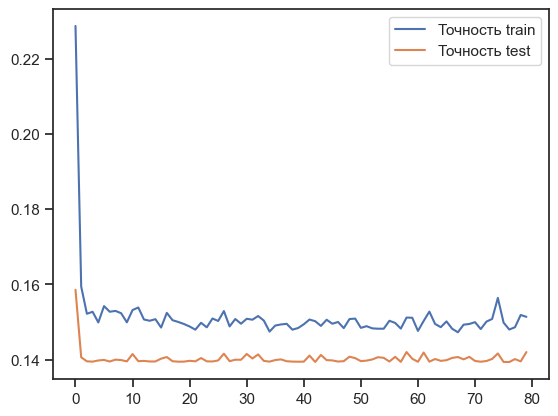

In [59]:
# модель полносвязной нейронной сети для целевого параметра y1 тренируем на нормализованных данных
modelNN_y1_2 = Sequential([
                Dense(32,  input_dim=11, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
modelNN_y1_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y1_2.summary()
history = modelNN_y1_2.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                192       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 0s - loss: 0.0518 - mae: 0.1843 - val_loss: 0.0388 - val_mae: 0.1610 - 333ms/epoch - 18ms/step
Epoch 2/50
19/19 - 0s - loss: 0.0455 - mae: 0.1709 - val_loss: 0.0366 - va

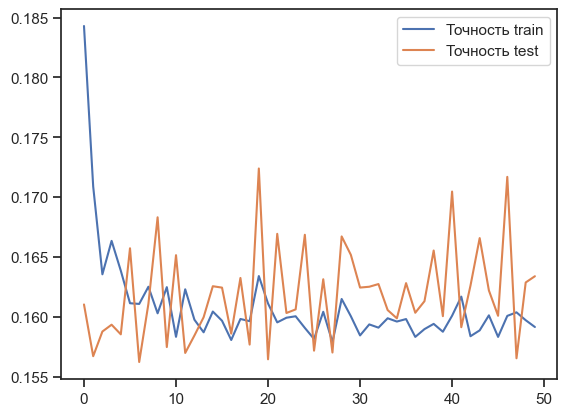

In [60]:
# модель полносвязной нейронной сети для целевого параметра y2 тренируем на нормализованных данных
modelNN_y2 = Sequential()
modelNN_y2.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_y2.add(Dropout(0.5))
modelNN_y2.add(Dense(32, activation = 'sigmoid'))
modelNN_y2.add(Dense(1, activation = 'tanh'))
modelNN_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_y2.summary()
history = modelNN_y2.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=50, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [61]:
y_pred_1 = modelNN_y1.predict(X_test_norm)
y_pred_2 = modelNN_y2.predict(X_test_norm)

y_pred = np.hstack((y_pred_1,y_pred_2))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAENN_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAENN_1)
MAENN_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAENN_2)

9/9 [==============================] - 0s 2ms/step
387.41386622717357
2.4513166330470755


In [62]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['NeuralNetwork_norm',MAENN_1])
MAE_y2.append(['NeuralNetwork_norm',MAENN_2])

In [63]:
# Результаты расчета ошибок моделей при предсказании целевого признака "Модуль упругости при растяжении, ГПа"
MAE_y1

[['Ridge_norm', 383.5418949118066],
 ['Lasso_norm', 383.097866737492],
 ['Elastic_norm', 383.6141264048189],
 ['GBR_norm', 393.13246980109784],
 ['KNeighborsRegressor_norm', 391.2828506285685],
 ['DecisionTreeRegressor_norm', 392.66753278727106],
 ['RandomForestRegressor_norm', 383.660282651128],
 ['AdaBoostRegressor_norm', 396.82548008181976],
 ['NeuralNetwork_norm', 387.41386622717357]]

In [64]:
# Результаты расчета ошибок моделей при предсказании целевого признака "Прочность при растяжении, МПа"
MAE_y2

[['Ridge_norm', 2.4553258416318995],
 ['Lasso_norm', 2.457493958479991],
 ['Elastic_norm', 2.451154883756544],
 ['GBR_norm', 2.5388210899684136],
 ['KNeighborsRegressor_norm', 2.6327301135045733],
 ['DecisionTreeRegressor_norm', 2.7284355495088404],
 ['RandomForestRegressor_norm', 2.4869743058053864],
 ['AdaBoostRegressor_norm', 2.5898282573327136],
 ['NeuralNetwork_norm', 2.4513166330470755]]

In [65]:
#  результаты MAE
a = np.array(MAE_y1)
b = np.array(MAE_y2)

MAE_errors = pd.DataFrame({'Модель регрессии': a[:,0], 'MAE Модуль упругости при растяжении, ГПа': a[:,1], 
                             'MAE Прочность при растяжении, МПа': b[:,1]})
MAE_errors = MAE_errors.astype({'MAE Модуль упругости при растяжении, ГПа': np.float16, 'MAE Прочность при растяжении, МПа': np.float16})
MAE_errors


,Модель регрессии,"MAE Модуль упругости при растяжении, ГПа","MAE Прочность при растяжении, МПа"
0,Ridge_norm,383.50,2.455078
1,Lasso_norm,383.00,2.457031
2,Elastic_norm,383.50,2.451172
3,GBR_norm,393.25,2.539062
4,KNeighborsRegressor_norm,391.25,2.632812
5,DecisionTreeRegressor_norm,392.75,2.728516
6,RandomForestRegressor_norm,383.75,2.486328
7,AdaBoostRegressor_norm,396.75,2.589844
8,NeuralNetwork_norm,387.50,2.451172


In [66]:
# результаты R2 
a = np.array(R2_y1)
b = np.array(R2_y2)
R2_errors = pd.DataFrame({'Модель регрессии': a[:,0], 'R2 Модуль упругости при растяжении, ГПа': a[:,1], 
                             'R2 Прочность при растяжении, МПа': b[:,1]})
R2_errors = R2_errors.astype({'R2 Модуль упругости при растяжении, ГПа': np.float16, 'R2 Прочность при растяжении, МПа': np.float16})
R2_errors

,Модель регрессии,"R2 Модуль упругости при растяжении, ГПа","R2 Прочность при растяжении, МПа"
0,Ridge_norm,0.002731,0.001235
1,Lasso_norm,0.002850,-0.001080
2,Elastic_norm,-0.000235,-0.000864
3,GBR_norm,-0.048767,-0.075134
4,KNeighborsRegressor_norm,-0.051453,-0.197266
5,DecisionTreeRegressor_norm,-0.090393,-0.282715
6,RandomForestRegressor_norm,-0.003275,-0.025696
7,AdaBoostRegressor_norm,-0.062988,-0.137329


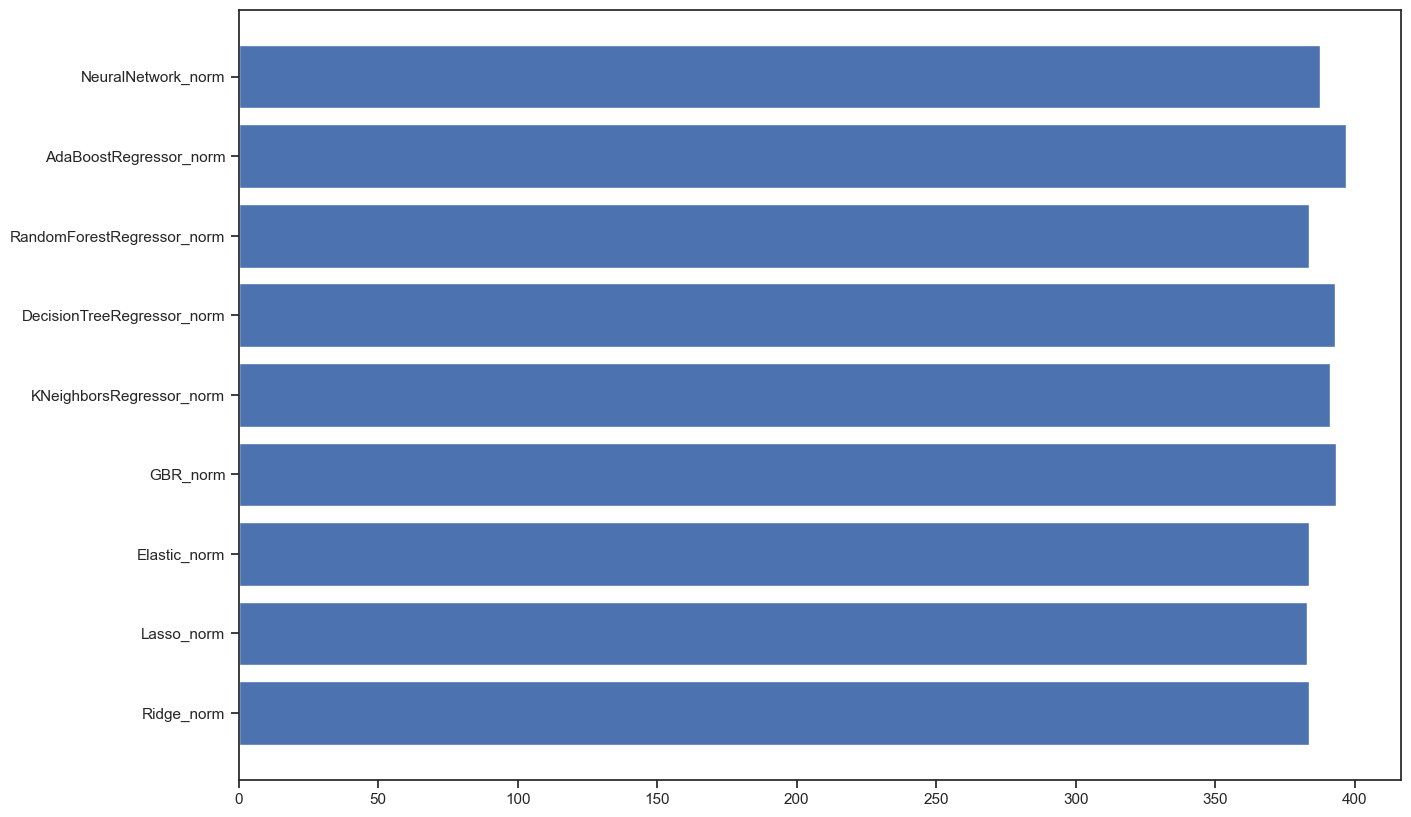

In [67]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(MAE_errors['Модель регрессии'], MAE_errors['MAE Модуль упругости при растяжении, ГПа'])
plt.show()

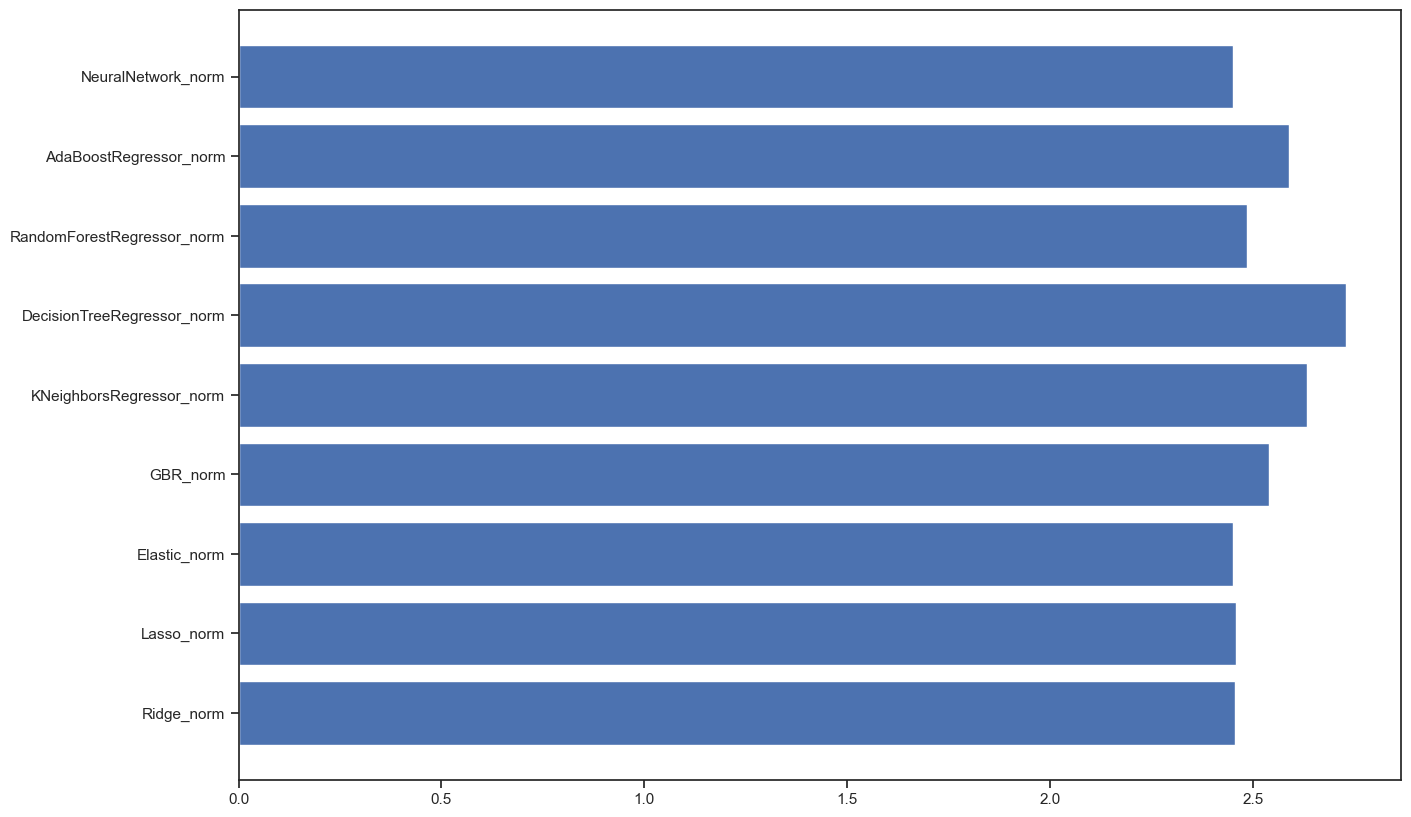

In [68]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(MAE_errors['Модель регрессии'], MAE_errors['MAE Прочность при растяжении, МПа'])
plt.show()

In [69]:
# Запишем результаты сравнения в файл
MAE_errors.to_excel('./Datasets/MAE_errors.xlsx')
R2_errors.to_excel('./Datasets/R2_errors.xlsx')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1200      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 25)                1275      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-traina

Epoch 63/80
19/19 - 0s - loss: 0.0389 - mae: 0.1583 - val_loss: 0.0388 - val_mae: 0.1627 - 35ms/epoch - 2ms/step
Epoch 64/80
19/19 - 0s - loss: 0.0388 - mae: 0.1584 - val_loss: 0.0378 - val_mae: 0.1604 - 35ms/epoch - 2ms/step
Epoch 65/80
19/19 - 0s - loss: 0.0388 - mae: 0.1585 - val_loss: 0.0382 - val_mae: 0.1612 - 41ms/epoch - 2ms/step
Epoch 66/80
19/19 - 0s - loss: 0.0388 - mae: 0.1583 - val_loss: 0.0387 - val_mae: 0.1623 - 34ms/epoch - 2ms/step
Epoch 67/80
19/19 - 0s - loss: 0.0388 - mae: 0.1583 - val_loss: 0.0379 - val_mae: 0.1606 - 33ms/epoch - 2ms/step
Epoch 68/80
19/19 - 0s - loss: 0.0388 - mae: 0.1584 - val_loss: 0.0378 - val_mae: 0.1605 - 27ms/epoch - 1ms/step
Epoch 69/80
19/19 - 0s - loss: 0.0388 - mae: 0.1585 - val_loss: 0.0378 - val_mae: 0.1605 - 31ms/epoch - 2ms/step
Epoch 70/80
19/19 - 0s - loss: 0.0388 - mae: 0.1585 - val_loss: 0.0376 - val_mae: 0.1601 - 23ms/epoch - 1ms/step
Epoch 71/80
19/19 - 0s - loss: 0.0388 - mae: 0.1585 - val_loss: 0.0381 - val_mae: 0.1611 - 28ms/

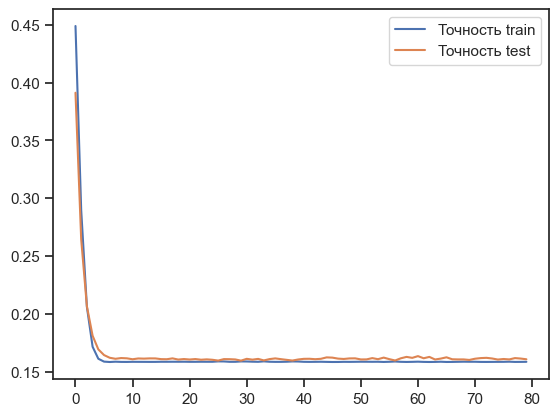

In [70]:
model_y2= Sequential()
model_y2.add(Dense(100, input_dim=11, activation='sigmoid'))
model_y2.add(LeakyReLU(alpha=1.0))
model_y2.add(Dense(50, activation='sigmoid'))
model_y2.add(LeakyReLU(alpha=1.0))
model_y2.add(Dense(25, activation='softmax'))

#IMPORTANT PART
model_y2.add(Dense(1, activation='linear'))
model_y2.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y2.summary()
history = model_y2.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1200      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 25)                1275      
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-traina

Epoch 63/80
19/19 - 0s - loss: 0.0351 - mae: 0.1479 - val_loss: 0.0272 - val_mae: 0.1395 - 29ms/epoch - 2ms/step
Epoch 64/80
19/19 - 0s - loss: 0.0351 - mae: 0.1480 - val_loss: 0.0275 - val_mae: 0.1397 - 26ms/epoch - 1ms/step
Epoch 65/80
19/19 - 0s - loss: 0.0351 - mae: 0.1477 - val_loss: 0.0270 - val_mae: 0.1395 - 30ms/epoch - 2ms/step
Epoch 66/80
19/19 - 0s - loss: 0.0351 - mae: 0.1477 - val_loss: 0.0275 - val_mae: 0.1398 - 25ms/epoch - 1ms/step
Epoch 67/80
19/19 - 0s - loss: 0.0351 - mae: 0.1480 - val_loss: 0.0273 - val_mae: 0.1396 - 29ms/epoch - 2ms/step
Epoch 68/80
19/19 - 0s - loss: 0.0351 - mae: 0.1478 - val_loss: 0.0273 - val_mae: 0.1396 - 28ms/epoch - 1ms/step
Epoch 69/80
19/19 - 0s - loss: 0.0351 - mae: 0.1478 - val_loss: 0.0271 - val_mae: 0.1395 - 34ms/epoch - 2ms/step
Epoch 70/80
19/19 - 0s - loss: 0.0351 - mae: 0.1479 - val_loss: 0.0270 - val_mae: 0.1395 - 28ms/epoch - 1ms/step
Epoch 71/80
19/19 - 0s - loss: 0.0351 - mae: 0.1478 - val_loss: 0.0272 - val_mae: 0.1395 - 30ms/

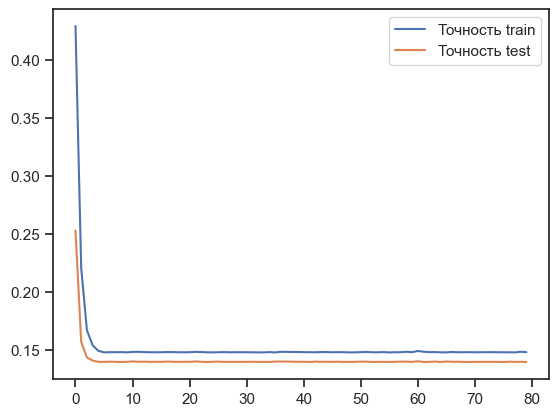

In [71]:
model_y1 = Sequential()
model_y1.add(Dense(100, input_dim=11, activation='sigmoid'))
model_y1.add(LeakyReLU(alpha=1.0))
model_y1.add(Dense(50, activation='sigmoid'))
model_y1.add(LeakyReLU(alpha=1.0))
model_y1.add(Dense(25, activation='softmax'))

#IMPORTANT PART
model_y1.add(Dense(1, activation='linear'))
model_y1.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_y1.summary()
history = model_y1.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=80, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [72]:
y_pred1 = model_y1.predict(X_test_norm)
y_pred2 = model_y2.predict(X_test_norm)

y_pred = np.hstack((y_pred1,y_pred2))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAEmodel_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
print (MAEmodel_1)
MAEmodel_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAEmodel_2)

R2model_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2model_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (R2model_1)
print (R2model_2)

9/9 [==============================] - 0s 468us/step
383.6388911179965
2.451568964806181
-0.00100009326870798
-6.698897244250546e-05
